import pandas as pd
import csv
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
# load all the data from a csv file
df_employees = pd.read_csv('data/employees.csv', delimiter=',', header='infer')
df_employees

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [3]:
# Numarul de angajati
print("Numarul de angajati: ", len(df_employees))

# Numar si tipul informatiilor (proprietatilor) detinute pentru un angajat
print("\nNumarul si tipul informatiilor (proprietăților) deținute pentru un angajat: ")
print(len(df_employees.columns)) # numarul informatiilor
print(list(df_employees.columns)) # tipul informatiilor

# Numărul de angajati pentru care se detin date complete
complete_data_count = df_employees.dropna().shape[0]
print("\nNumărul de angajați pentru care se dețin date complete: ", complete_data_count)

Numarul de angajati:  1000

Numarul si tipul informatiilor (proprietăților) deținute pentru un angajat: 
8
['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary', 'Bonus %', 'Senior Management', 'Team']

Numărul de angajați pentru care se dețin date complete:  764


In [4]:
# Valorile minime, maxime, medii pentru fiecare proprietate

print("Valorile minime, maxime, medii pentru fiecare proprietate:")
df_employees.describe().loc[['min', 'max', 'mean']]

Valorile minime, maxime, medii pentru fiecare proprietate:


,Salary,Bonus %
min,35013.000,1.015000
max,149908.000,19.944000
mean,90662.181,10.207555


In [5]:
# In cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate

non_numeric_properties = df_employees.select_dtypes(include=['object']).columns
unique_values = df_employees[non_numeric_properties].nunique()
unique_values

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Senior Management      2
Team                  10
dtype: int64

In [6]:
# Daca sunt valori lipsa si cum se poate rezolva aceasta problema

# verificam daca sunt valori lipsa
df_employees.isnull().sum() #suma valorilor lipsa pentru fiecare coloana

# eleiminam randurile (axis 0 din DataFrame) in care este vreo coloana care contine o valoare nula:
df_employees = df_employees.dropna(axis=0, how='any')
df_employees

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


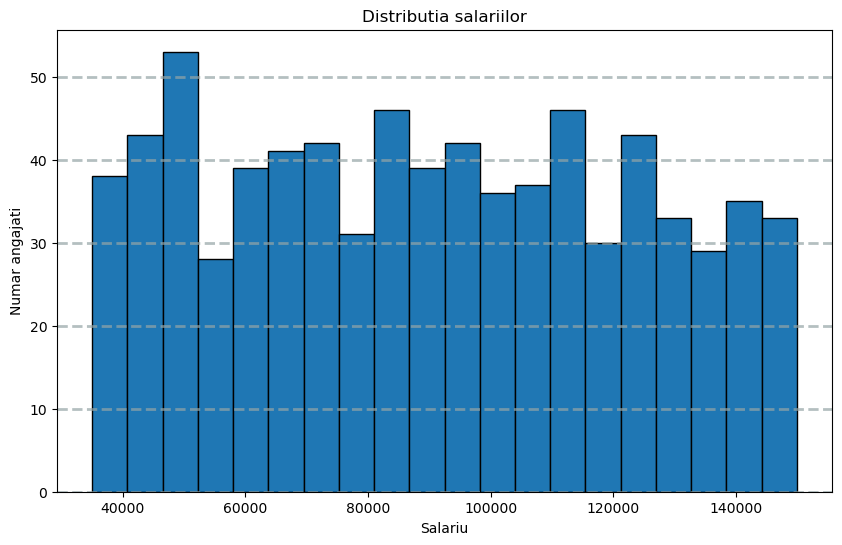

In [7]:
# Distributia salariilor acestor angajati pe categorii de salar

# Get the variable to examine
var_data = df_employees['Salary']

# Create a Figure
plt.figure(figsize=(10, 6))

# Plot a histogram
plt.hist(df_employees['Salary'], bins=20, edgecolor='black')

# Add titles and labels
plt.title('Distributia salariilor')
plt.xlabel('Salariu')
plt.ylabel('Numar angajati')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Show the figure
plt.show()

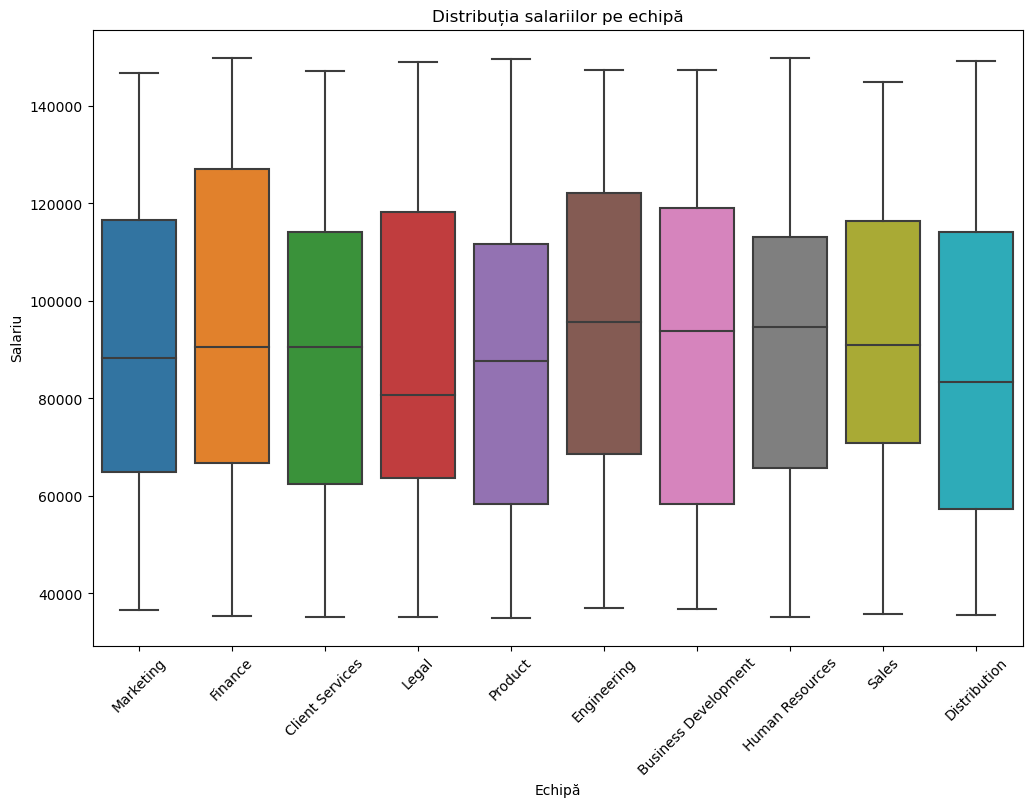

In [8]:
# Distributia salariilor acestor angajati pe categorii de salar si echipa din care fac parte

# Create a Figure
plt.figure(figsize=(12, 8))

# Create boxplot
sns.boxplot(x='Team', y='Salary', data=df_employees)

# Add titles and labels
plt.title('Distribuția salariilor pe echipă')
plt.xlabel('Echipă')
plt.ylabel('Salariu')
plt.xticks(rotation=45)

# Show the figure
plt.show()

In [14]:
# Angajatii care pot fi considerati "outlieri"

#identificarea outlierilor
q1 = df_employees['Salary'].quantile(0.25) # valoarea sub care se află 25% din date
q3 = df_employees['Salary'].quantile(0.75) # valoarea sub care se află 75% din date
iqr = q3 - q1 # amplitudinea intervalului în care se află mijlocul a 50% din date
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_employees[(df_employees['Salary'] < lower_bound) | (df_employees['Salary'] > upper_bound)]
print("Angajații considerați outlieri:")
outliers

Angajații considerați outlieri:


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team


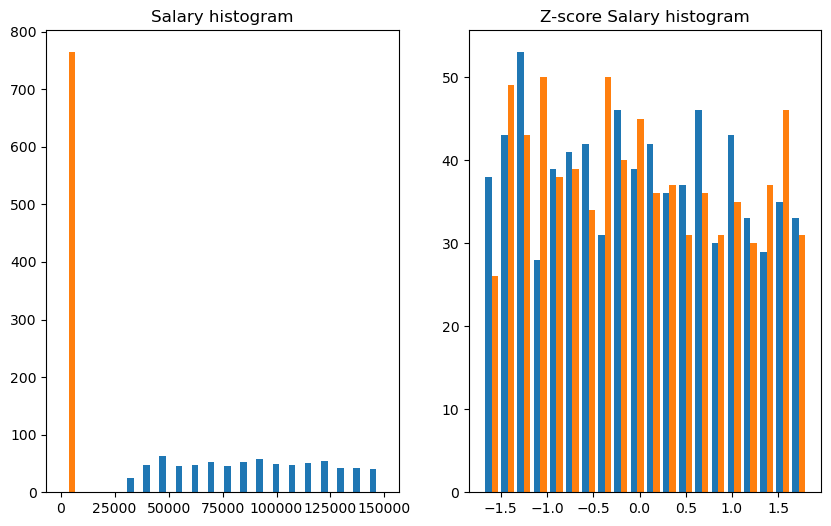

In [10]:
# Normalizarea informatiilor: salariu, bonus, echipa

# Z Normalisation (standardisation)
# it preserves the data distribution

# Create a new dataframe for the scaled values
df_normalized = df_employees.copy()

# Encode the 'Team' column using one-hot encoding
team_encoded = pd.get_dummies(df_normalized['Team'], prefix='Team')
df_normalized = pd.concat([df_normalized, team_encoded], axis=1)
df_normalized.drop(columns=['Team'], inplace=True)

# Select the features for normalization
features = df_normalized[['Salary', 'Bonus %']]

# Metoda StandardScaler
scaler = StandardScaler()
df_normalized[['Salary', 'Bonus %']] = scaler.fit_transform(features)

# Plot the normalized values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(df_employees[['Salary', 'Bonus %']], 20)
ax1.set_title('Salary histogram')
ax2.hist(df_normalized[['Salary', 'Bonus %']], 20)
ax2.set_title('Z-score Salary histogram')
plt.show()

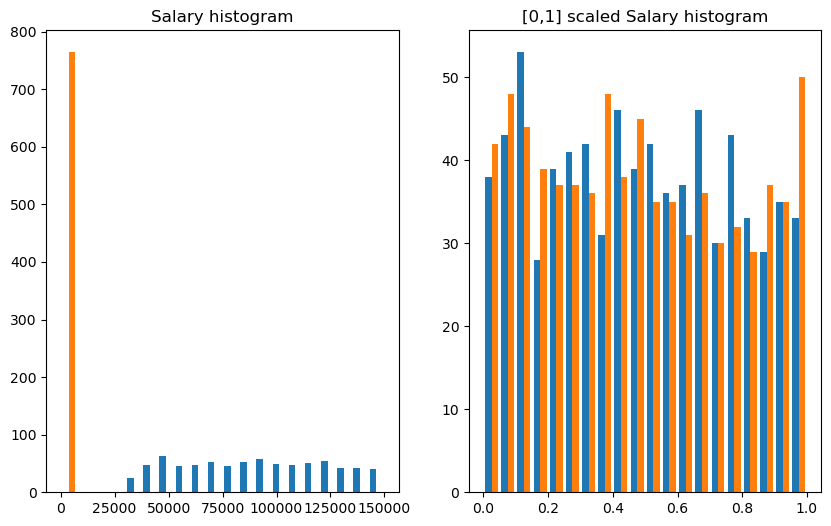

In [11]:
# Normalizarea informatiilor: salariu, bonus, echipa

# [0, 1] scalling
# it helps to map data into the same range

# Perform MinMax scaling
scaler = MinMaxScaler()
df_normalized[['Salary', 'Bonus %']] = scaler.fit_transform(features)

# Plot the normalized values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(df_employees[['Salary', 'Bonus %']], 20)
ax1.set_title('Salary histogram')
ax2.hist(df_normalized[['Salary', 'Bonus %']], 20)
ax2.set_title('[0,1] scaled Salary histogram')
plt.show()